## Mall Customer Segmentation with K-Means Clustering

#### Objective
Segment customers of a shopping mall into meaningful groups based on their age, annual income, and spending behavior using K-Means Clustering. This helps businesses target marketing strategies more effectively.

#### Dataset

* CustomerID – Unique ID of each customer
* Gender – Male or Female
* Age – Age of customer
* Annual Income (k) – Annual income in $1000
* Spending Score (1–100) – Score assigned based on customer behavior and spending



### 1. Import Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### 2. Extract Dataset

In [3]:
df = pd.read_csv('Mall_Customers (1).csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Understanding Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 4. Data Cleaning

##### 4.1 Check missing values


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### 4.2 Check duplicate entries


In [9]:
df.duplicated().sum()

np.int64(0)

##### 4.3 Drop unused column


In [10]:
df.drop('CustomerID', axis=1, inplace=True)

##### 4.4 Check Data Shape


In [11]:
df.shape

(200, 4)

### 5. EDA

In [9]:
sns.set_theme(style = 'darkgrid', palette = 'coolwarm')

#### 5.1 Distribution of Numerical Features

In [12]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

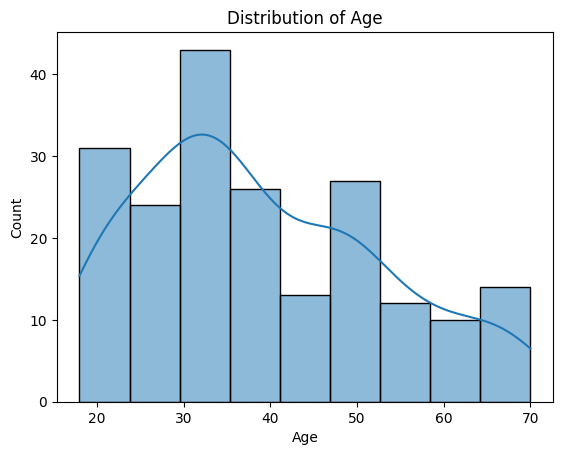

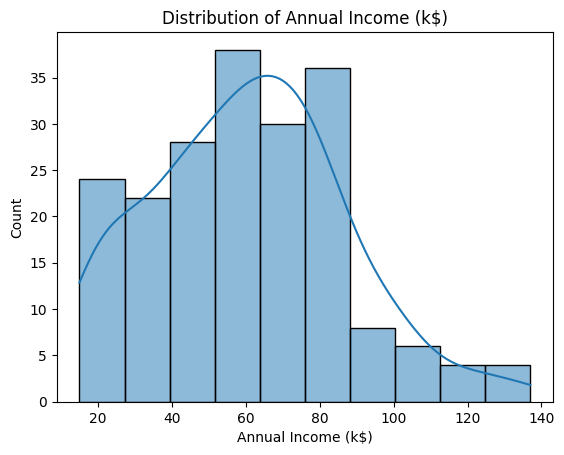

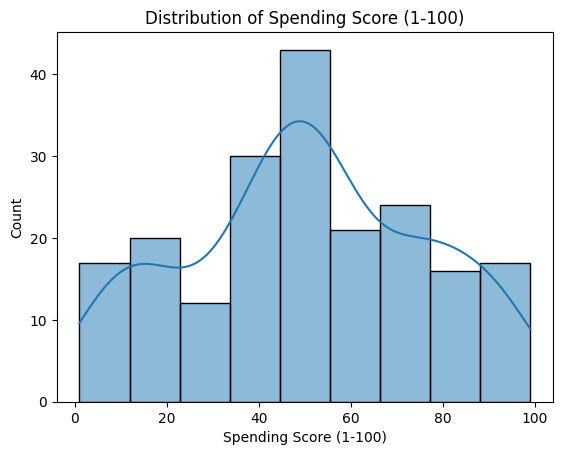

In [13]:
for col in columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

#### 5.2 KDE Plot by Gender

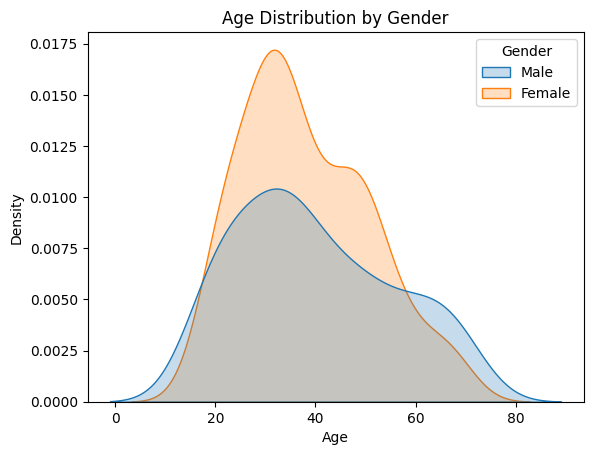

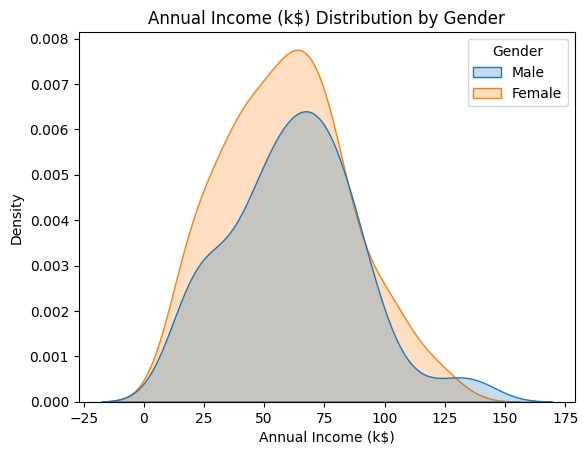

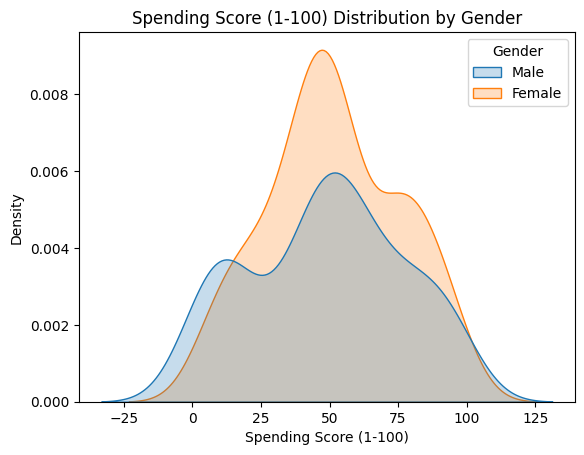

In [14]:
for col in columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True)
    plt.title(f'{col} Distribution by Gender')

#### 5.3 Boxplot Comparison by Gender

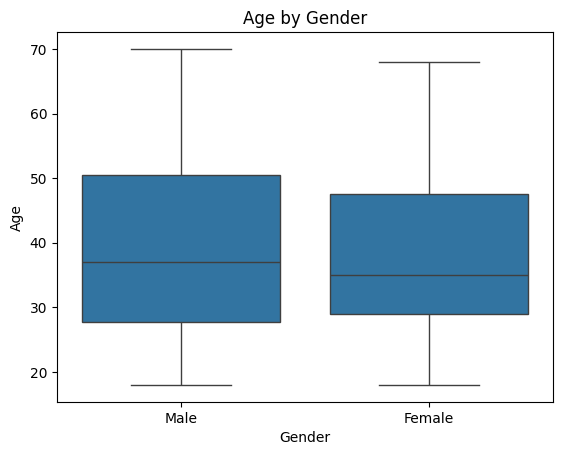

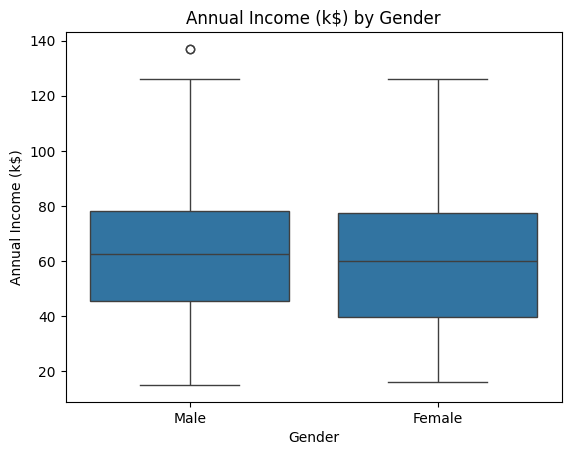

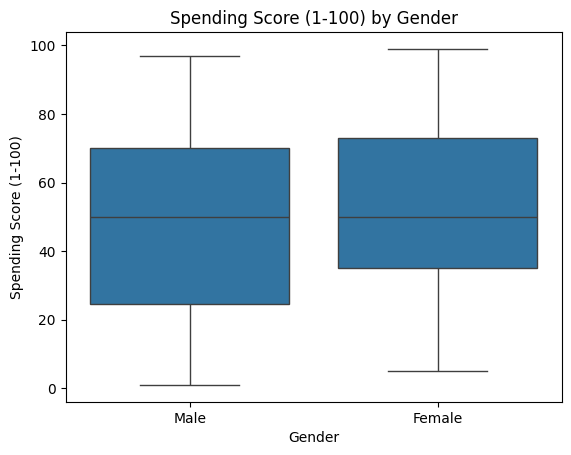

In [15]:
for col in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=col)
    plt.title(f'{col} by Gender')

#### 5.4 Gender Proportion

In [18]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [19]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#### 5.5 Bivariate Plots

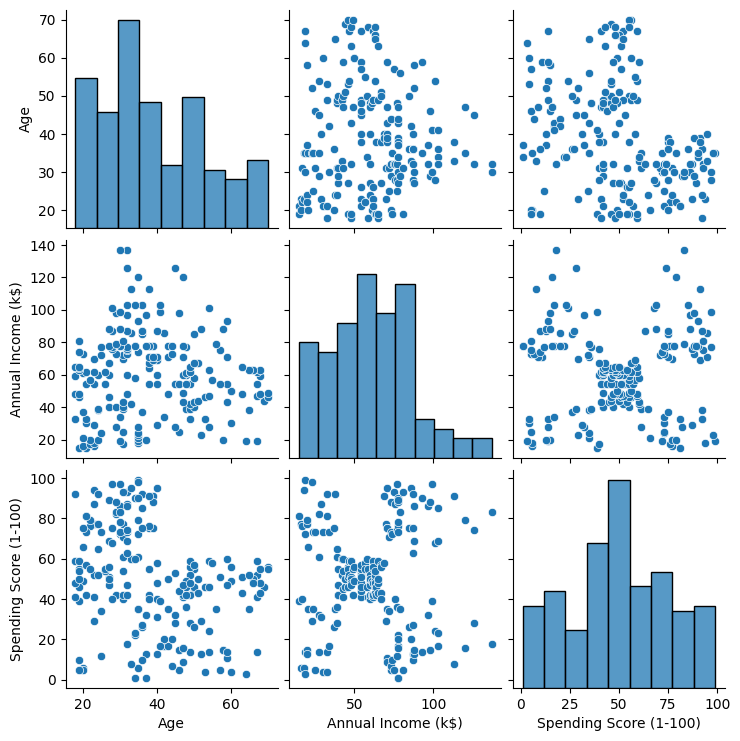

In [22]:
sns.pairplot(df)

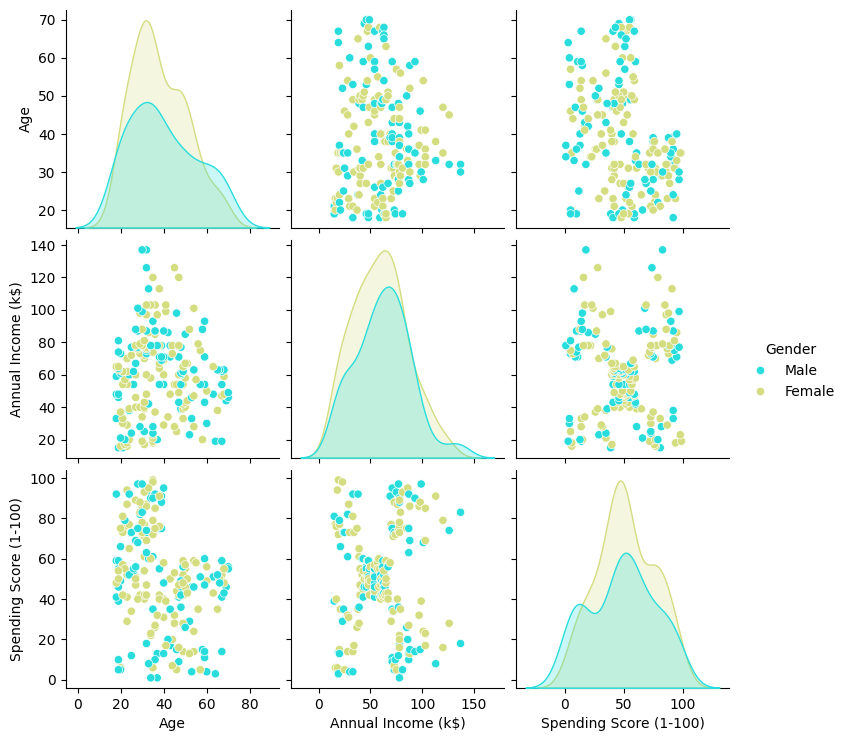

In [23]:
sns.pairplot(df, hue='Gender', palette='rainbow')

#### 5.6 Summary Statistics by Gender

In [24]:
df.groupby('Gender')[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


#### 5.7 Correlation Heatmap

<Axes: >

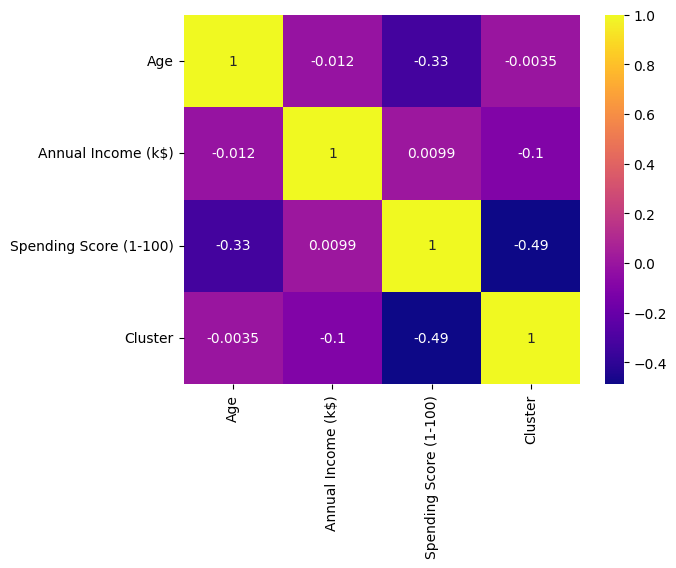

In [41]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='plasma')

### 6. K-Means Clustering

We'll use the 2D combination of Annual Income and Spending Score for initial visualization.

##### 6.1 Feature Selection


In [28]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


##### 6.2 Elbow Method to Find Optimal k


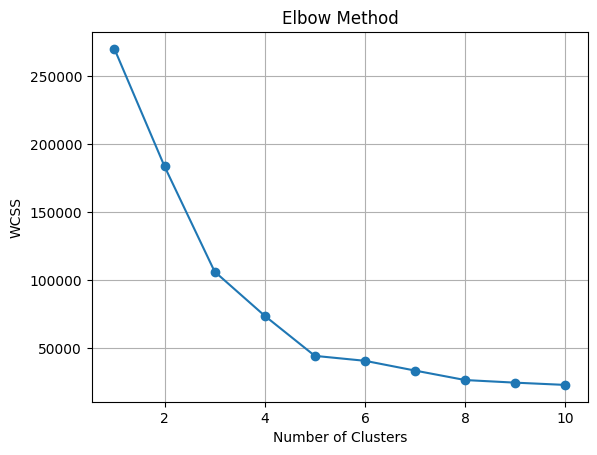

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##### 6.3 Fit Final Model


In [31]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

##### 6.4 Visualize Clusters


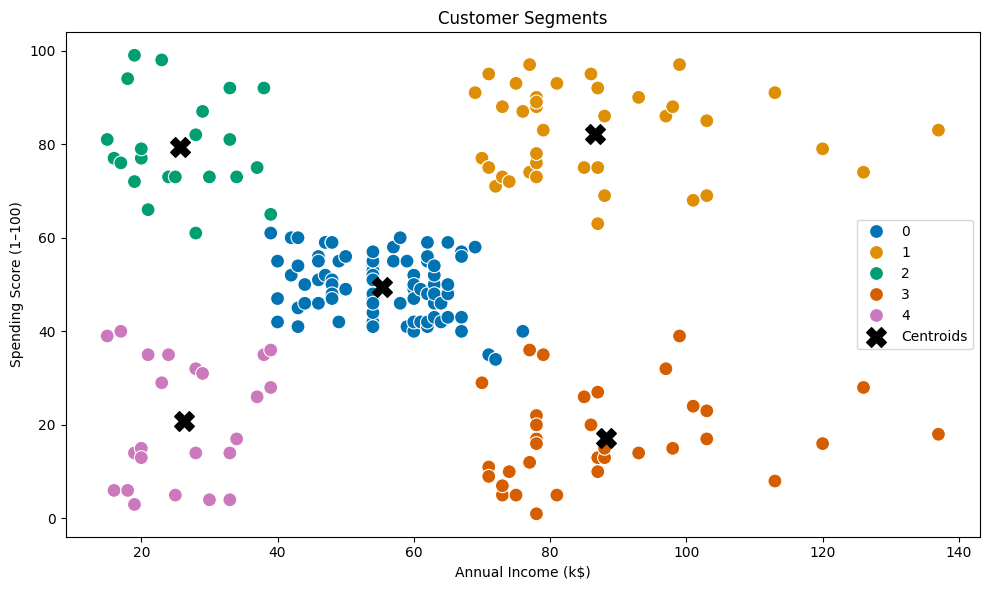

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=y_kmeans, palette='colorblind', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.tight_layout()
plt.show()

## Key Insights

| Cluster | Color            | Interpretation                     | Customer Profile                       | Business Strategy                       |
| ------- | ---------------- | ---------------------------------- | -------------------------------------- | --------------------------------------- |
| **0**   | Blue             | Moderate income, moderate spending | Average earners with balanced spending | Standard retention strategies           |
| **1**   | Orange           | High income, low spending          | Price-sensitive wealthy customers      | Emphasize value, personalized outreach  |
| **2**   | Green            | Low income, high spending          | Impulse or value-driven shoppers       | Target with budget deals, loyalty perks |
| **3**   | Red/Orange-brown | High income, high spending         | Top-tier customers                     | Premium/VIP service, upselling          |
| **4**   | Pink             | Low income, low spending           | Cost-conscious low earners             | Not primary target, mass promotions     |





## Conclusion

Customer segmentation using K-Means clustering has uncovered five distinct customer groups based on their income and spending behavior. These insights allow for tailored marketing strategies and smarter business decisions. Here's a breakdown of each cluster and how the business can act on them:

Cluster 0 (Moderate Income, Moderate Spending)
* A stable segment with balanced behavior. Ideal for upselling and customer loyalty programs to boost their long-term value.

Cluster 1 (High Income, Low Spending)
* These customers have high purchasing power but low engagement. Targeted strategies such as exclusive product offerings or luxury bundles can encourage them to spend more.

Cluster 2 (Low Income, High Spending)
* This unique group spends generously despite limited income. Incentivize their loyalty with rewards, flash discounts, and referral bonuses to maintain engagement and prevent churn.

Cluster 3 (High Income, High Spending)
* The most profitable segment. Prioritize them with premium services, early access to products, and VIP treatment to maximize retention and advocacy.

Cluster 4 (Low Income, Low Spending)
* Less profitable but potentially loyal. Understand their needs and offer budget-friendly promotions to keep them engaged without aggressive sales tactics.

